# Imports + data loading

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
plt.rcParams['figure.figsize'] = (7, 7)
from scipy.stats import median_abs_deviation

In [60]:
adata = sc.read("/home/p/pohll/Downloads/aged_bleomycin(1).h5ad")

# new PCA, UMAP, and Leiden

In [61]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.25)

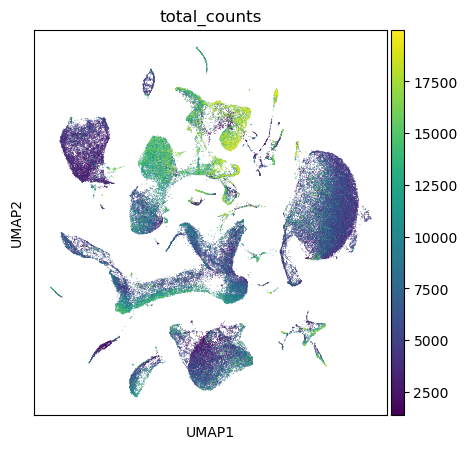

In [62]:
sc.pl.umap(adata, color= "total_counts")

In [63]:
sc.tl.leiden(adata, key_added="leiden_res0_1", resolution=0.1)
sc.tl.leiden(adata, key_added="leiden_res0_3", resolution=0.3)
sc.tl.leiden(adata, key_added="leiden_res0_4", resolution=0.4)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


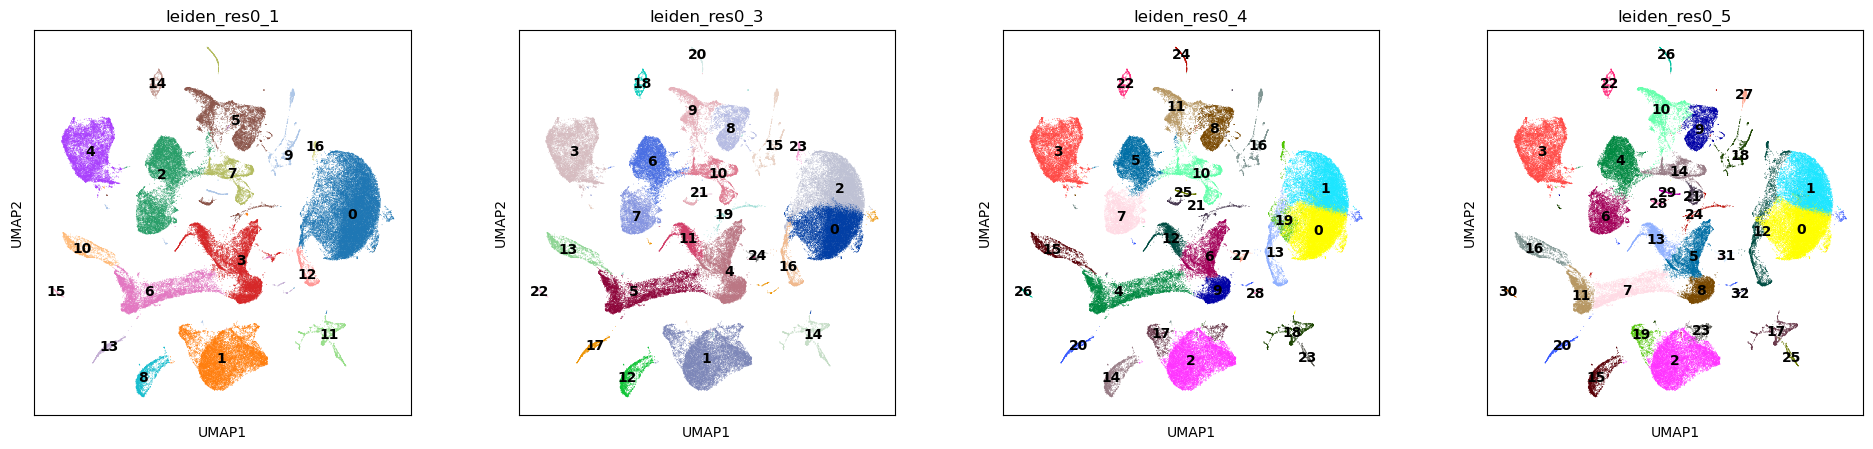

In [64]:
plt.rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color=["leiden_res0_1","leiden_res0_3", "leiden_res0_4", "leiden_res0_5"],
    legend_loc="on data",
)

--> use leiden 0.1 for coarse and 0.3 with subclustering for fine anno

In [97]:
adata.obs = adata.obs.drop('leiden_res0_4', axis=1)

In [98]:
adata.obs = adata.obs.drop('leiden_res0_5', axis=1)

## Comapare new and given clustering 

In [93]:
old_labels = adata.obs["clust_res0.3"]
new_labels = adata.obs['leiden_res0_3']

old_clusters = np.unique(old_labels)
old_clusters = np.sort(old_clusters)

new_clusters = np.unique(new_labels)
new_clusters = np.sort(new_clusters)


overlap_matrix = np.zeros((len(old_clusters), len(new_clusters)))
overlap_matrix_percentage = np.zeros((len(old_clusters), len(new_clusters)))

overlap_matrix_percentage_T = np.zeros((len(old_clusters), len(new_clusters)))



for i, old_cluster in enumerate(old_clusters):
    for j, new_cluster in enumerate(new_clusters):
        overlap_matrix[i, j] = np.sum((old_labels == old_cluster) & (new_labels == new_cluster))
        overlap_matrix_percentage[i, j] = round((np.sum((old_labels == old_cluster) & (new_labels == new_cluster)) /
                                           np.sum(old_labels == old_cluster)) * 100, 2)

        overlap_matrix_percentage_T[i, j] = round((np.sum((old_labels == old_cluster) & (new_labels == new_cluster)) /
                                           np.sum(new_labels == new_cluster)) * 100, 2)
        




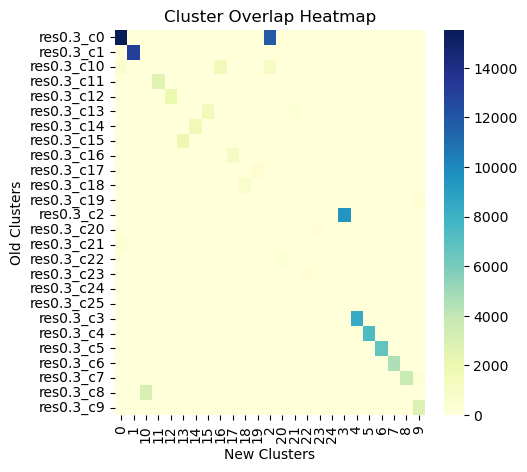

In [90]:
plt.figure(figsize=(5,5))
sns.heatmap(overlap_matrix, cmap="YlGnBu",  xticklabels=new_clusters, yticklabels=old_clusters)
plt.xlabel("New Clusters")
plt.ylabel("Old Clusters")
plt.title("Cluster Overlap Heatmap")
plt.show()

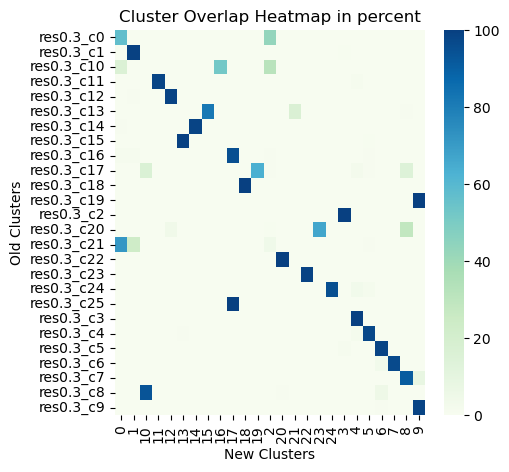

In [134]:
plt.figure(figsize=(5,5))
sns.heatmap(overlap_matrix_percentage, annot=False, cmap="GnBu",  xticklabels=new_clusters, yticklabels=old_clusters
              )
plt.xlabel("New Clusters")
plt.ylabel("Old Clusters")
plt.title("Cluster Overlap Heatmap in percent")
plt.show()

- Most cluster nearly identical except:
- cO
- c1O
- c13
- c17
- c20 
- c21

--> look at these in more detail (dotplot groupby clust_res03, leiden_res0_3) perhaps subcluster/reannotate

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


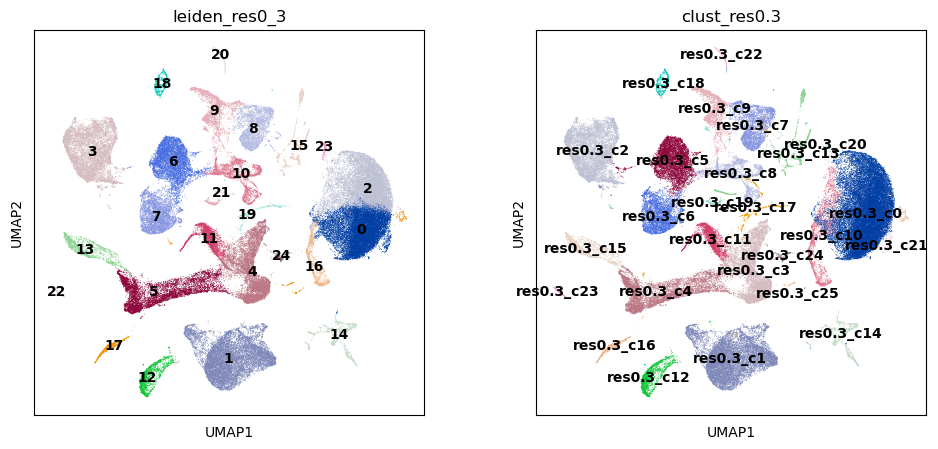

In [95]:
sc.pl.umap(
    adata,
    color=["leiden_res0_3", "clust_res0.3"],
    legend_loc="on data",
)

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


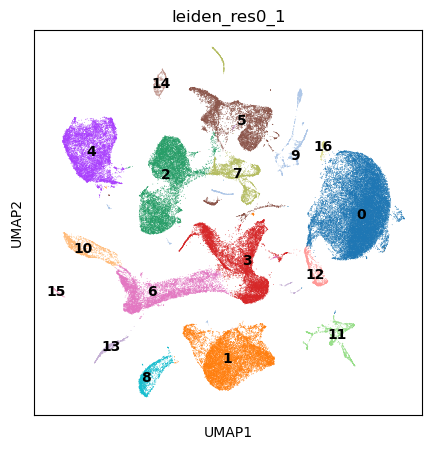

In [102]:
sc.pl.umap(
    adata,
    color=["leiden_res0_1"],
    legend_loc="on data",
)

In [126]:
adata.write("/home/p/pohll/Desktop/MP/data/galapagos_bleo_new_dr_leiden.h5ad")

# Annotation 

In [19]:
all_marker_genes = {
  "AT1": ["S100a6", "Ager", "Pdpn", "Vegfa"],
  "AT2": ["Muc1", "Sftpc", "Sftpd", "Cxcl15", "Lcn2"],
  "Transitioning epithelial": ["Krt8", "Krt18"],
  "Epithelial": ["Epcam", "Cdh1"],
  "Alveolar macrophages": ["Marco", "Chil3", "Fabp4", "Siglecf", "Il18", "Ear1", "Fabp1", "Car4", "Ctsk", "Chil3", "S100a1", "Wfdc21", "Itgam", "Cd36", "Gpnmb", "Litaf", "Jund", "Bhlhe40", "Bhlhe41", "Klf9", "Atf3", "Atf4"],
  "Interstitial macrophages": ["Trem2", "C1qa"],
  "Classical monocytes": ["F13a1", "Ly6c2"],
  "Non-classical monocytes": ["Treml4", "Fcgr3"],
  "Dendritic cells": ["Clec9a", "H2-Aa"],
  "Dendritic cells pDC": ["Siglech", "Clec4b1"],#  Clec4b1 instead of Clec4c
  "Dendritic cells Ccr7-hi": ["Ccr7"],
  "CD4 T-cells": ["Cd4", "Cd3e", "Cd3d"],
  "CD8 T-cells": ["Cd8a", "Cd3d"],
  "NK cells": ["Tyrobp", "Gzma", "Nkg7"],
  "B-cells": ["Cd79a", "Cd19", "Ms4a1"],
  "Neutrophils": ["S100a8", "S100a9"],
  "Endothelial": ["Pecam1", "Ly6c1"], # Pecam1 instead of Pecam4
  "Lymphatic endothelial": ["Pdpn"],
  "Aerocytes": ["Car4", "Ednrb"],
  "Pericytes": ["Vtn", "Mcam", "Cspg4"],
  "Lipofibroblasts": ["Plin2", "Lpl", "Tcf21"],
  "Myofibroblasts": ["Cthrc1", "Spp1", "Pdgfra", "Col3a1", "Postn", "Tnc", "S100a6", "Ccl2"],
  "Alveolar fibroblast": ["Npnt", "Ces1d", "Slc7a10"],
  "Adventitial fibroblast": ["Pi16", "Dcn", "Il33", "Ccl11", "Adh7"],
  "Peribronchial fibroblasts": ["Hhip", "Aspn", "Fgf18", "Lgr5", "Lgr6"],
  "SMCs": ["Acta2", "Tagln", "Myh11"]
}

## Dotplot new Leiden 

### Coarse Anno new Leiden

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


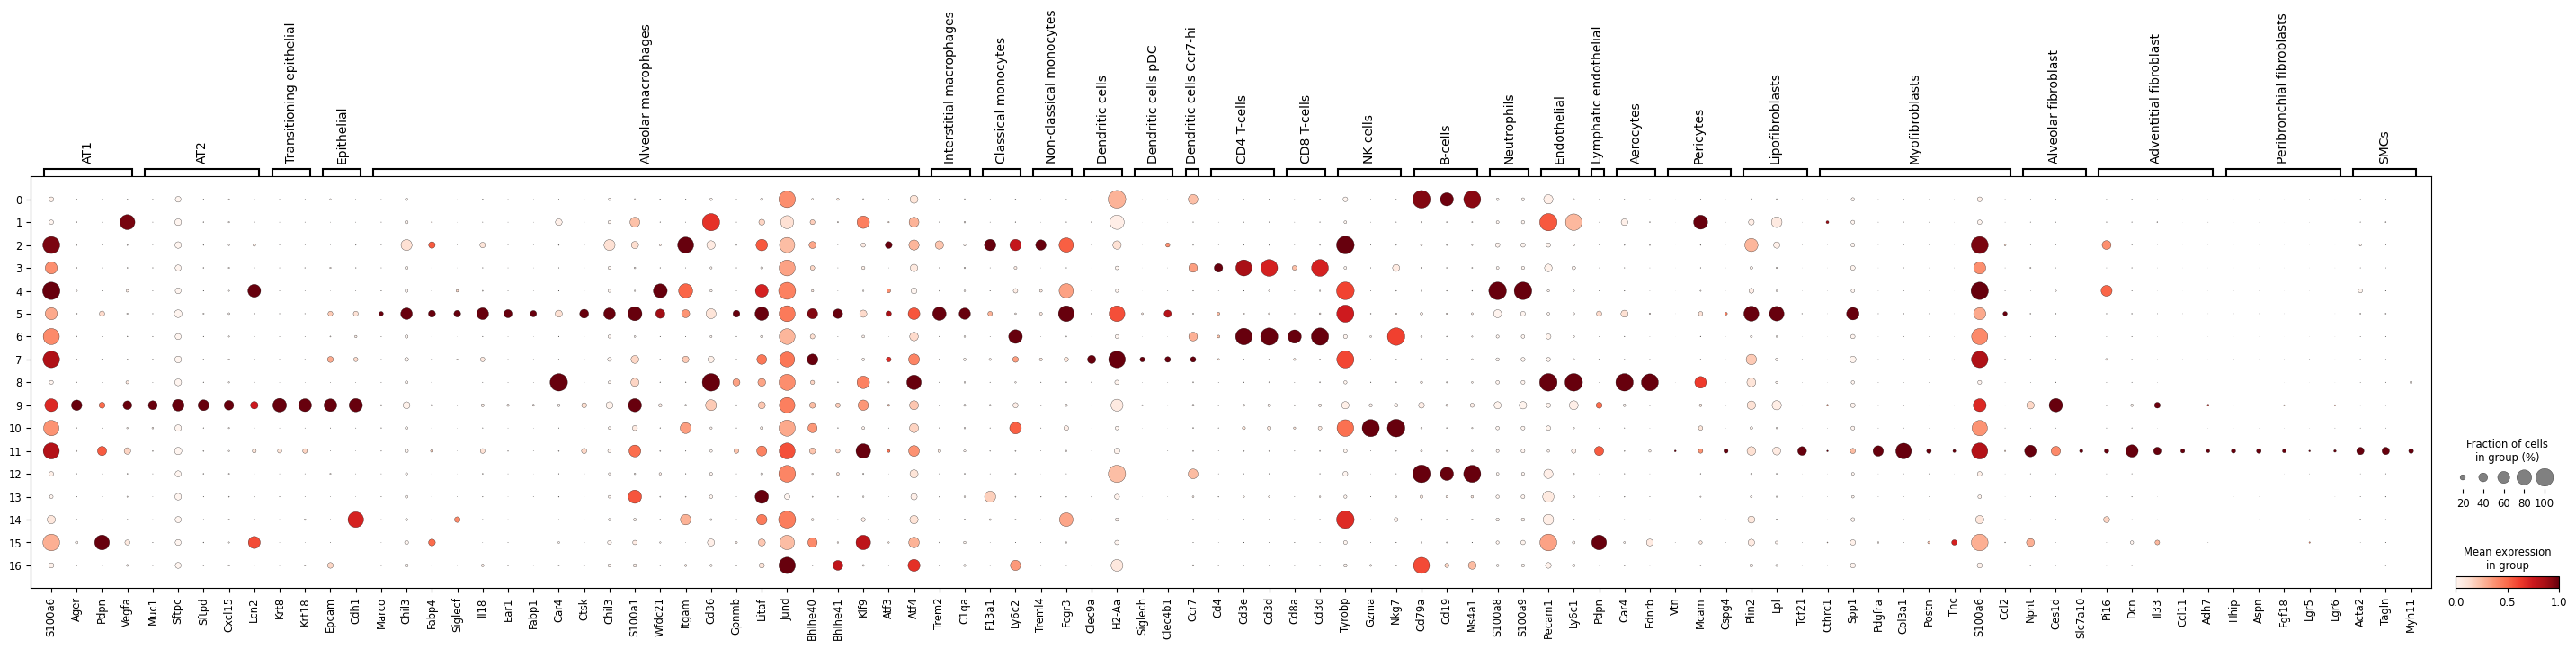

In [101]:
sc.pl.dotplot(adata, all_marker_genes, groupby=['leiden_res0_1'],  standard_scale="var")

In [232]:
new_leiden_coarse = {
    "0": "B-cells",
    "1": "Endothelial",
    "2": "Monocytes",
    "3": "T-cells",
    "4": "Neutrophils",
    "5": "Macrophages",
    "6": "T-cells",
    "7": "Dendritic cells",
    "8": "Endothelial",
    "9": "Epithelial",
    "10": "NK cells",
    "11": "Fibroblasts",
    "12": "B-cells",
    "13": "SMCs",
    "14": "Granulocytes",
    "15": "Endothelial",
    "16":"B-cells"
}

--> better to make coarse anno as high hierarchy of fine anno 

### Fine Anno new Leiden

1. plot marker genes

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


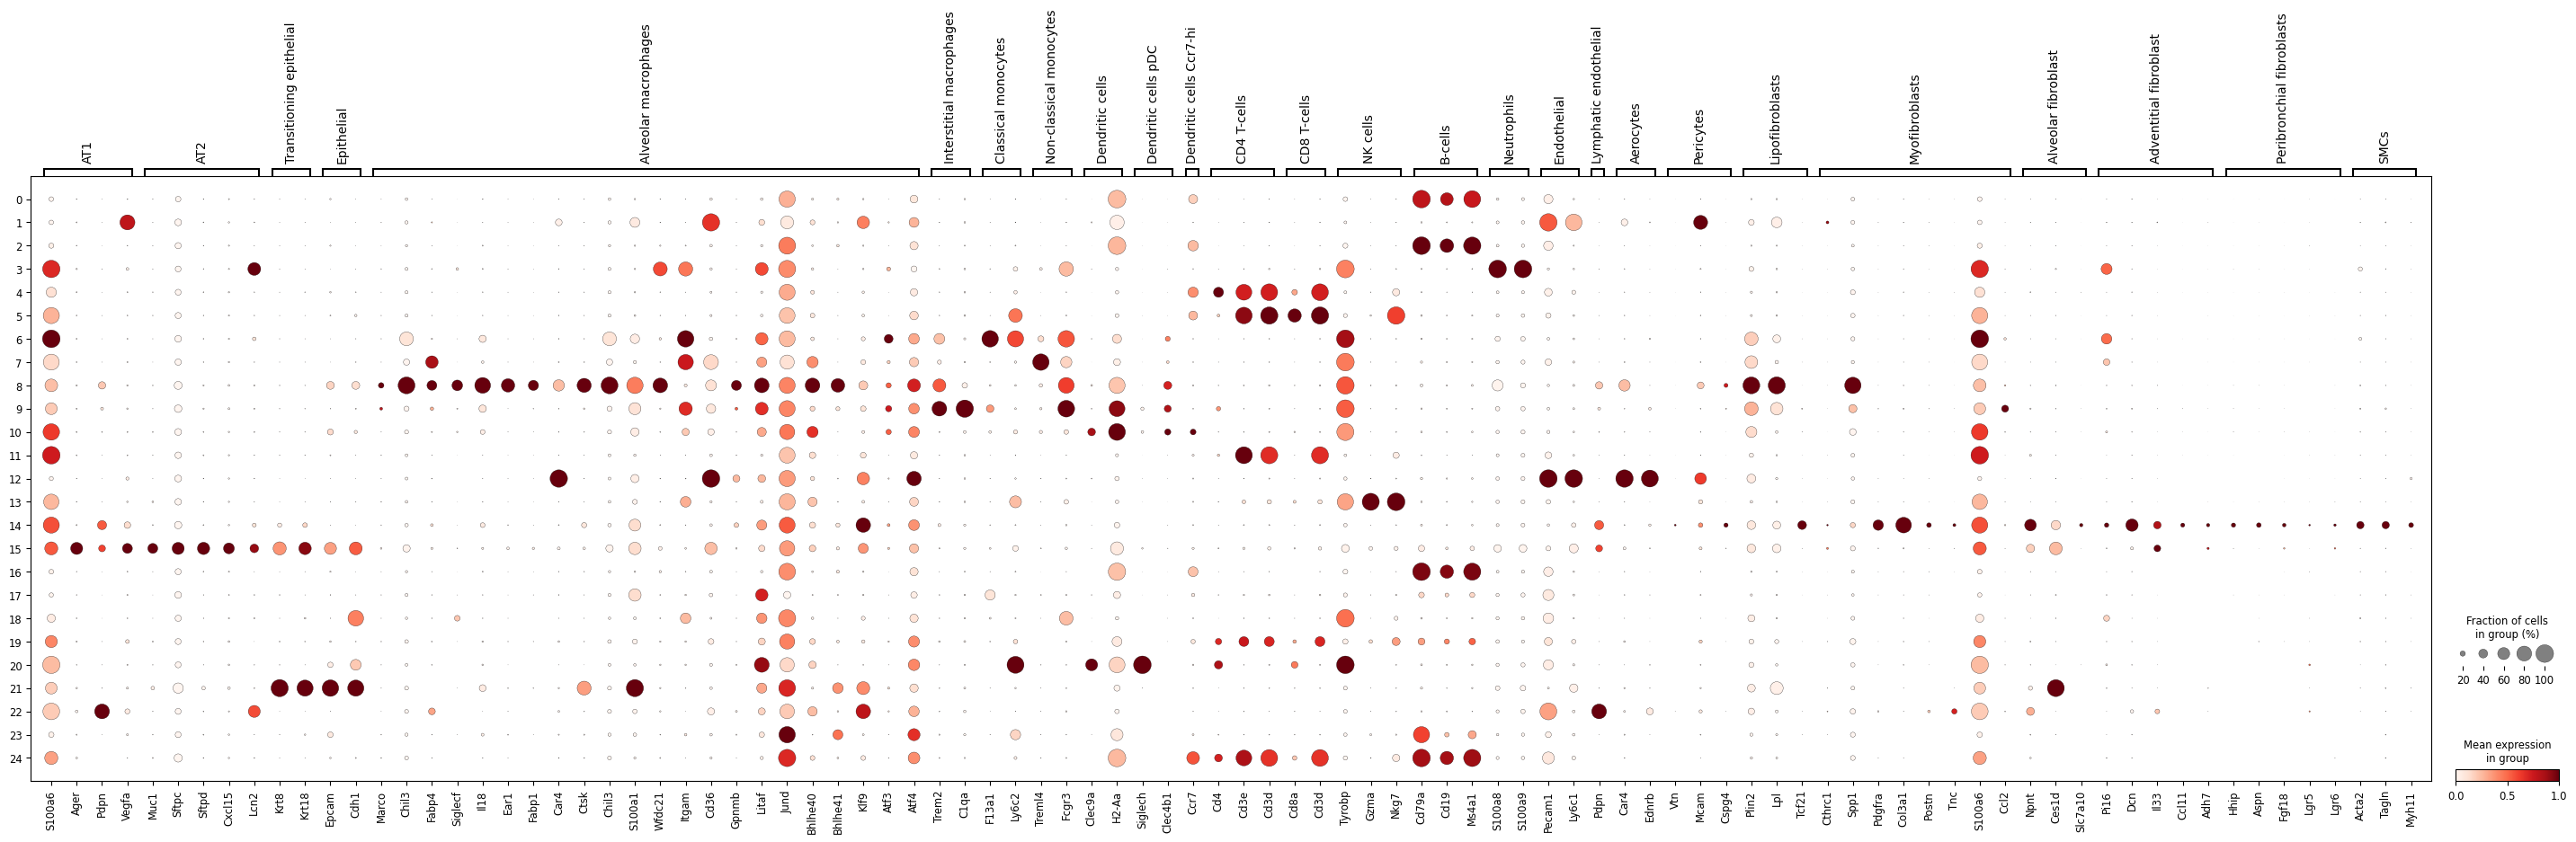

In [106]:
sc.pl.dotplot(adata, all_marker_genes, groupby=['leiden_res0_3'],  standard_scale="var")

In [233]:
new_leiden_fine = {
    "0": "B-cells",
    "1": "Endothelial",
    "2": "B-cells",
    "3": "Neutrophils",
    "4": "CD4 T-cells",
    "5": "CD8 T-cells",
    "6": "Classical monocytes",
    "7": "Non-classical monocytes", # many doublets or B-cells 
    "8": "Alveolar macrophages",
    "9": "Interstitial macrophages",
    "10": "Dendritic cells",
    "11": "T-cells",
    "12": "Aerocytes",
    "13": "NK cells",
    "14": "Fibroblasts",
    "15": "Epithelial",
    "16":"B-cells",
    "17":"SMCs",
    "17,3":"B-cells",
    "17,4":"Erythroid cells",
    "18":"Granulocytes",
    "19":"T-cells",
    "20":"Dendritic cells",
    "21":"Epithelial",
    "22":"Endothelial",
    "23":"B-cells",
    "24":"T-cells",
}

In [234]:
adata.obs["manual_celltype_annotation_fine_leiden03"] = adata.obs["leiden_res0_3"].map(new_leiden_fine).astype("category")

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


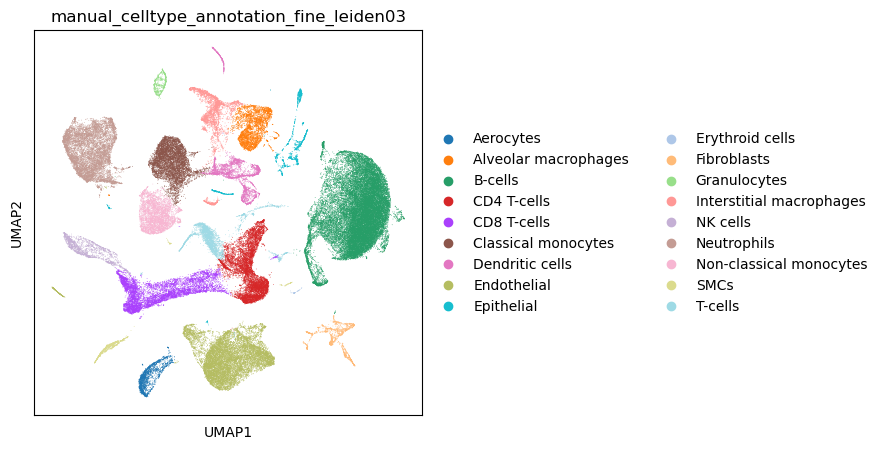

In [235]:
sc.pl.umap(
    adata,
    color=["manual_celltype_annotation_fine_leiden03"],
)

### rank_genes_groups 

look at cluster 
10 --> cst3 --> Dendritic cells,
17 --> ?? split again 
18, FCER1A --> Granulocytes
22, flt4 --> endothelial 
23 --> B-cells

In [114]:
sc.tl.rank_genes_groups(
    adata, layer="logcounts", groupby="leiden_res0_3", method="wilcoxon", key_added="dea_leiden_res0_3"
)

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/tools/_ran

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


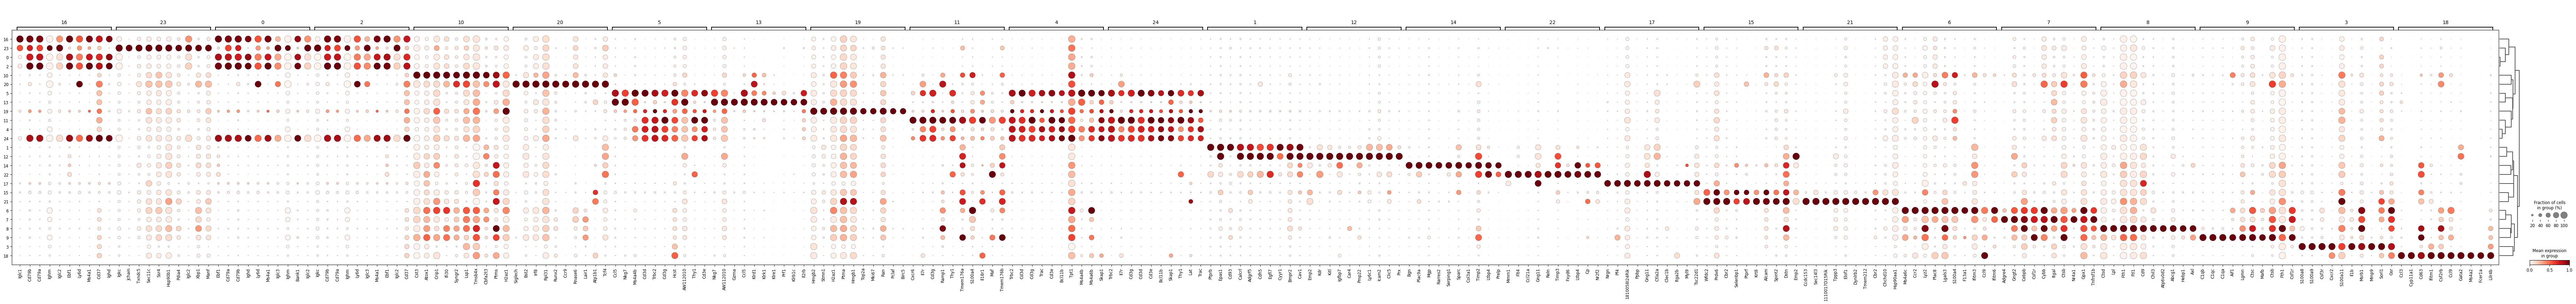

In [117]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res0_3", standard_scale="var", n_genes=10, key="dea_leiden_res0_3"
)

### subcluster cluster 17

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


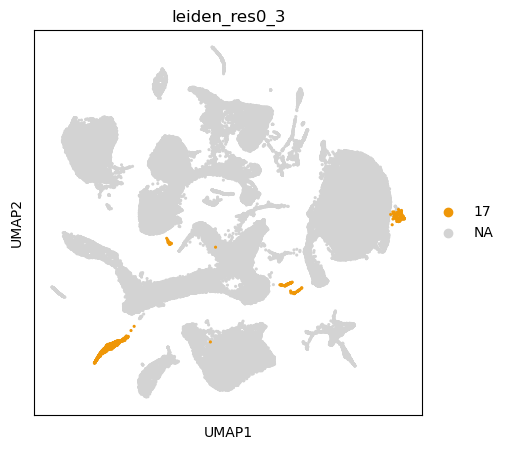

In [170]:
sc.pl.umap(adata, color="leiden_res0_3",groups="17" ,size=20)

In [188]:
sc.tl.leiden(adata, restrict_to= ("leiden_res0_3", ['17']),  key_added="leiden_res0_3", resolution=0.3 )

In [189]:
adata.obs["leiden_res0_3"].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17,0', '17,1', '17,2', '17,3', '17,4', '17,5',
       '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


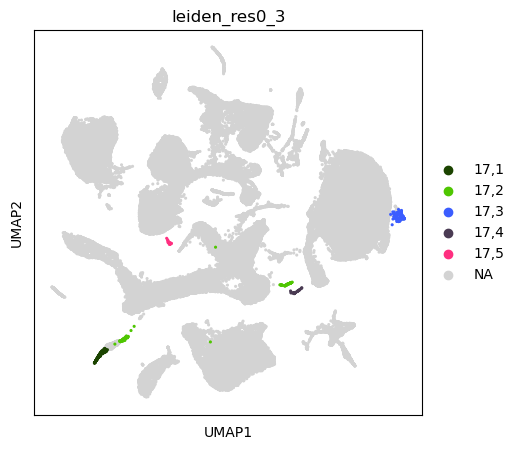

In [190]:
sc.pl.umap(adata, color="leiden_res0_3",groups=["17,1", '17,2', '17,3', '17,4', '17,5'] ,size=20)

In [192]:
sc.tl.rank_genes_groups(
    adata, layer="logcounts", groupby="leiden_res0_3", groups=["17,1", '17,2', '17,3', '17,4', '17,5'], method="wilcoxon", key_added="dea_leiden_res0_3_17"
)

In [195]:
sc.tl.dendrogram(adata,  groupby="leiden_res0_3")

categories: 0, 1, 2, etc.
var_group_labels: 17,1, 17,2, 17,3, etc.


/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


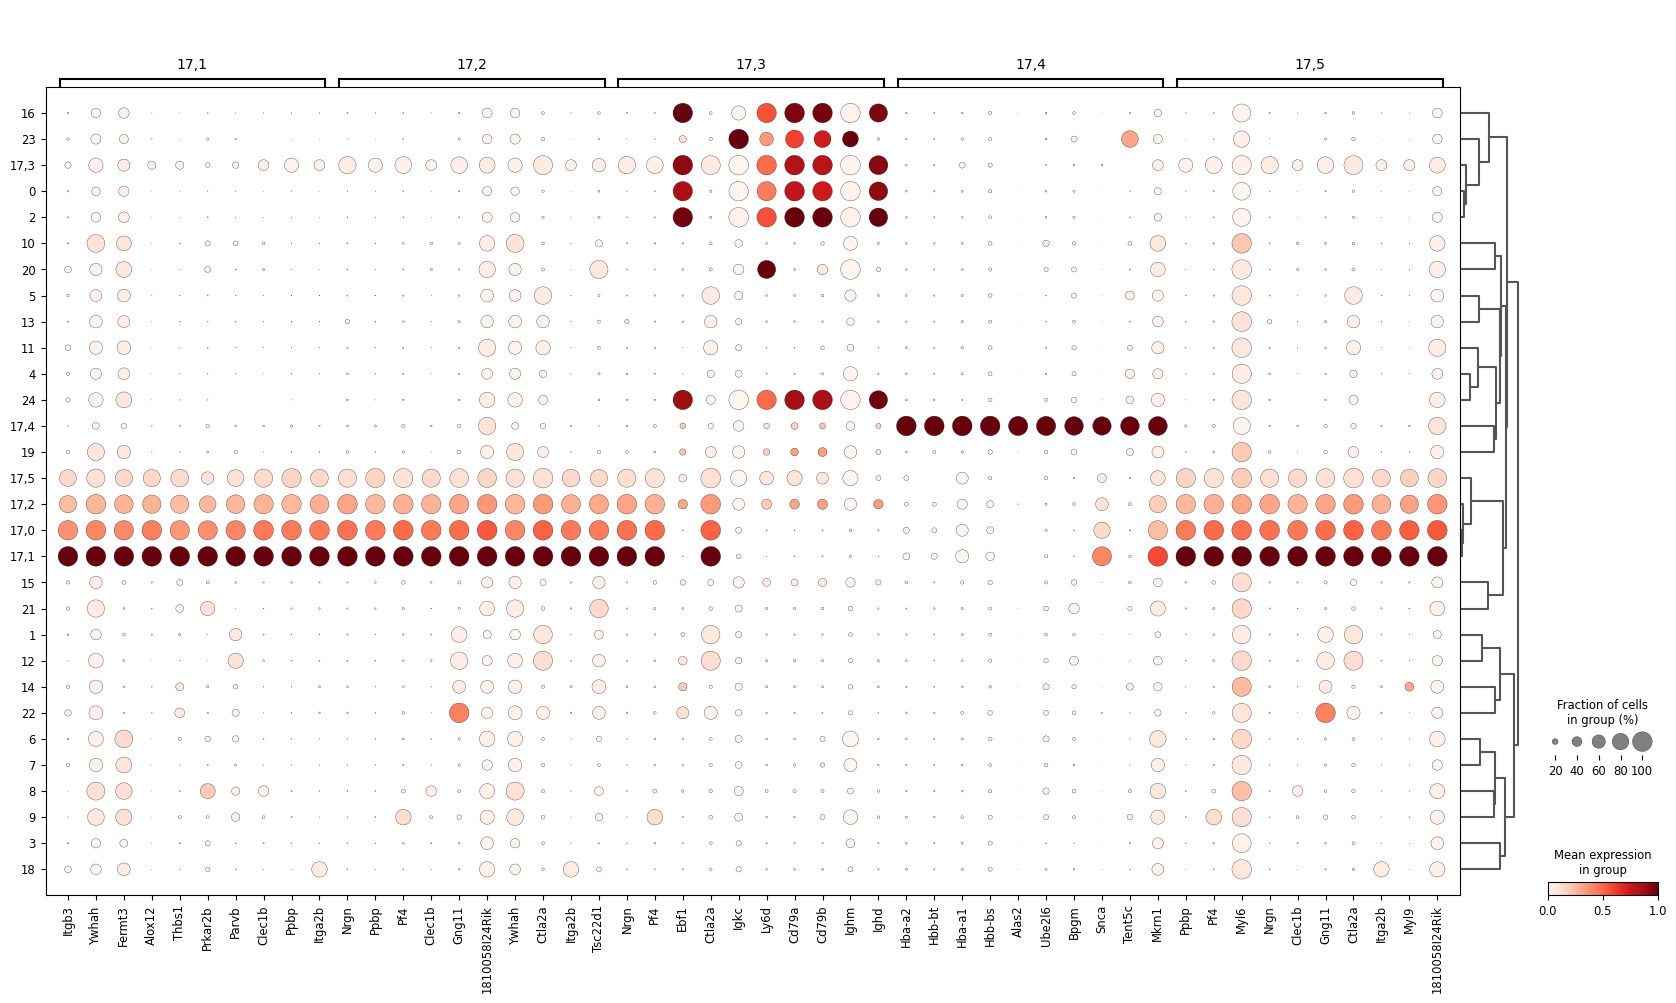

In [196]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res0_3", groups=["17,1", '17,2', '17,3', '17,4', '17,5'], standard_scale="var", n_genes=10, key="dea_leiden_res0_3_17"
)

- 17,4 --> Erythroid cells
- 17,0 + 17,1 + 17,2 + 17,5 --> SMCs
- 17,3 --> B-cells

In [197]:
adata.obs["leiden_res0_3"] = adata.obs["leiden_res0_3"].replace("17,0", "17")
adata.obs["leiden_res0_3"] = adata.obs["leiden_res0_3"].replace("17,1", "17")
adata.obs["leiden_res0_3"] = adata.obs["leiden_res0_3"].replace("17,2", "17")
adata.obs["leiden_res0_3"] = adata.obs["leiden_res0_3"].replace("17,5", "17")



In [198]:
adata.obs["leiden_res0_3"].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '17,3', '17,4', '18', '19', '20', '21',
       '22', '23', '24'],
      dtype='object')

## Dotplot old Clustering Res 03

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


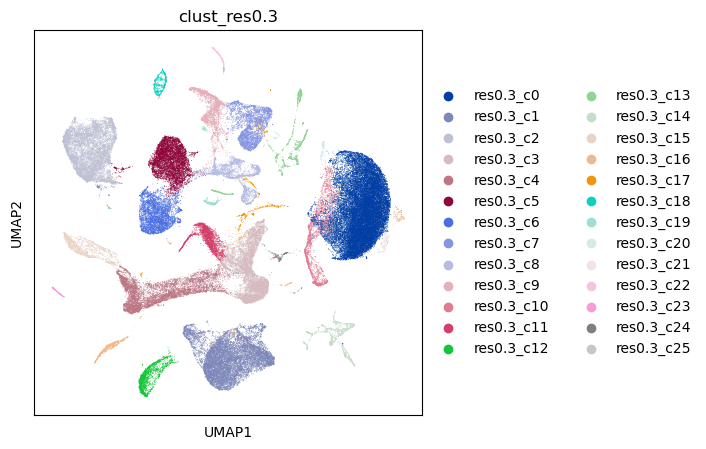

In [108]:
sc.pl.umap(adata, color="clust_res0.3")

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


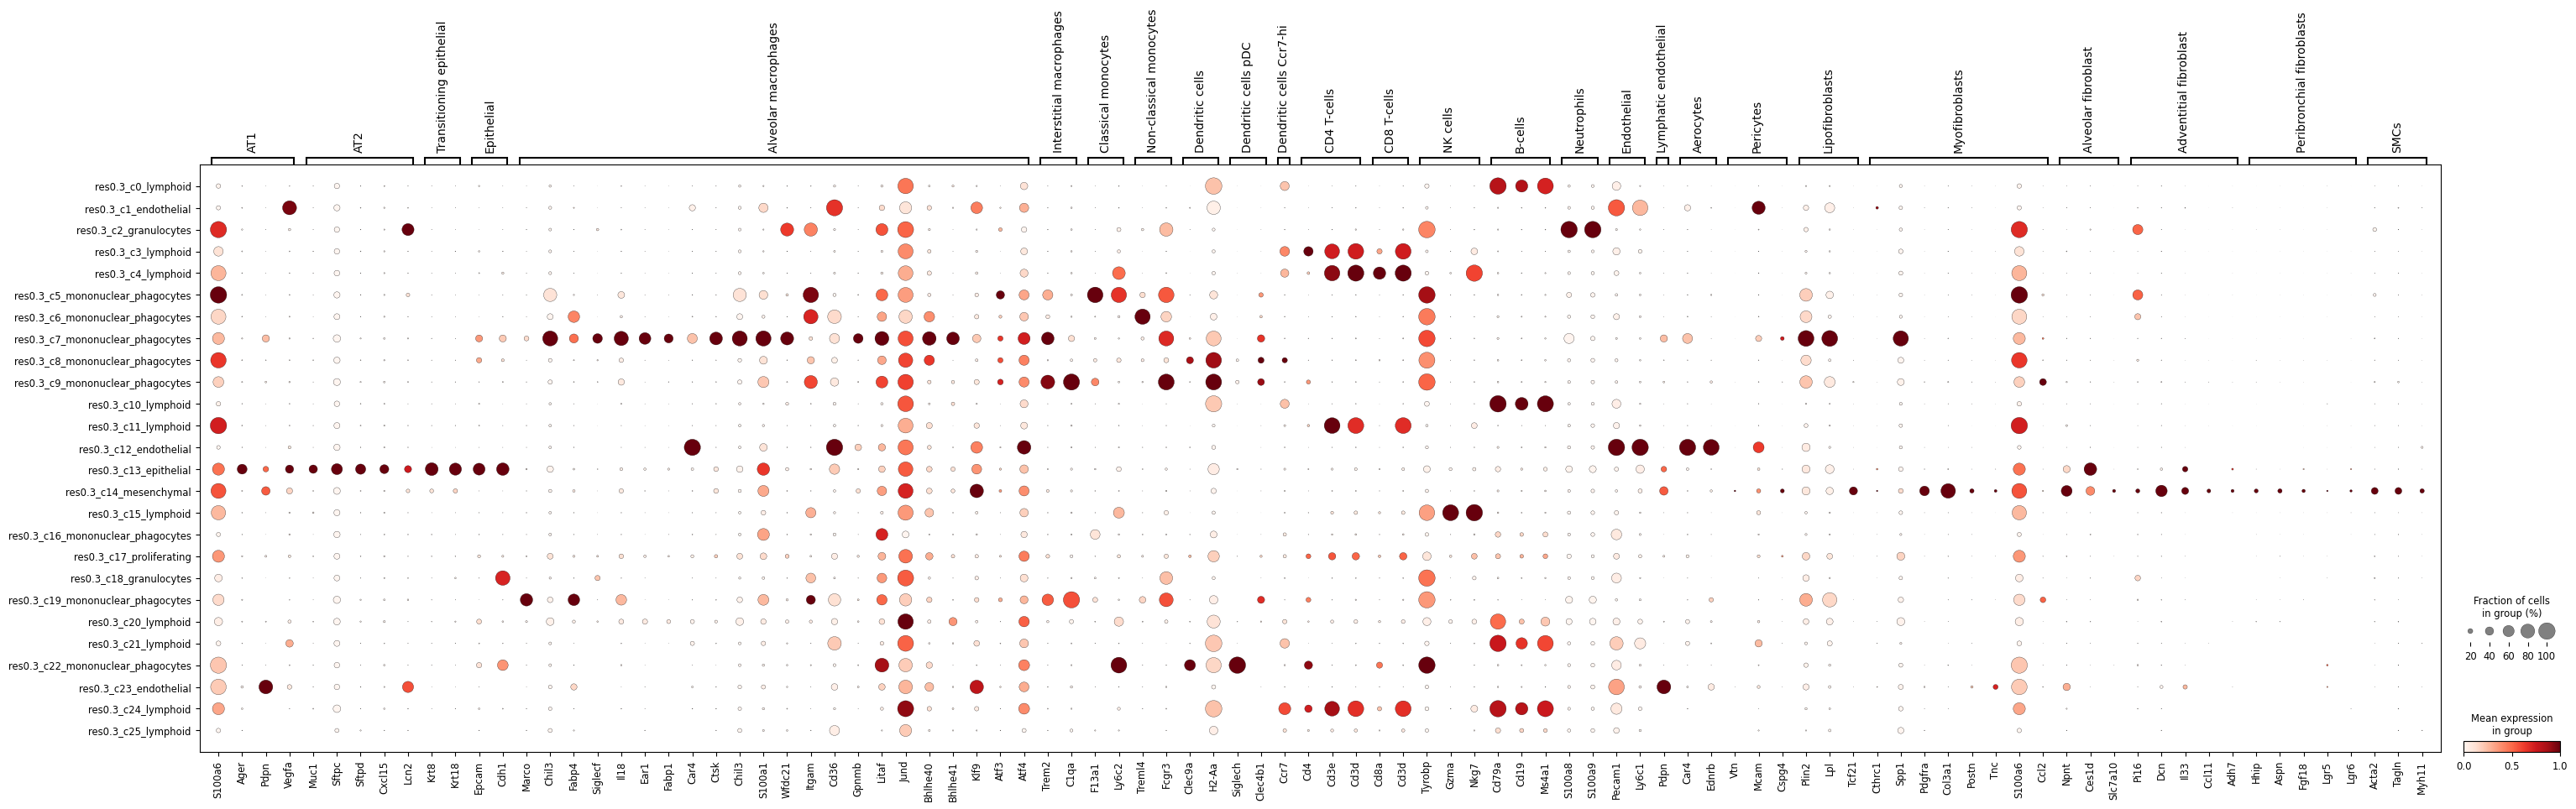

In [107]:
sc.pl.dotplot(adata, all_marker_genes, groupby=['clust_res0.3', "CELL_celltype_compartment"],  standard_scale="var")


check if expression pattern of marker genes different for control vs. bleo: --> no big difference

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


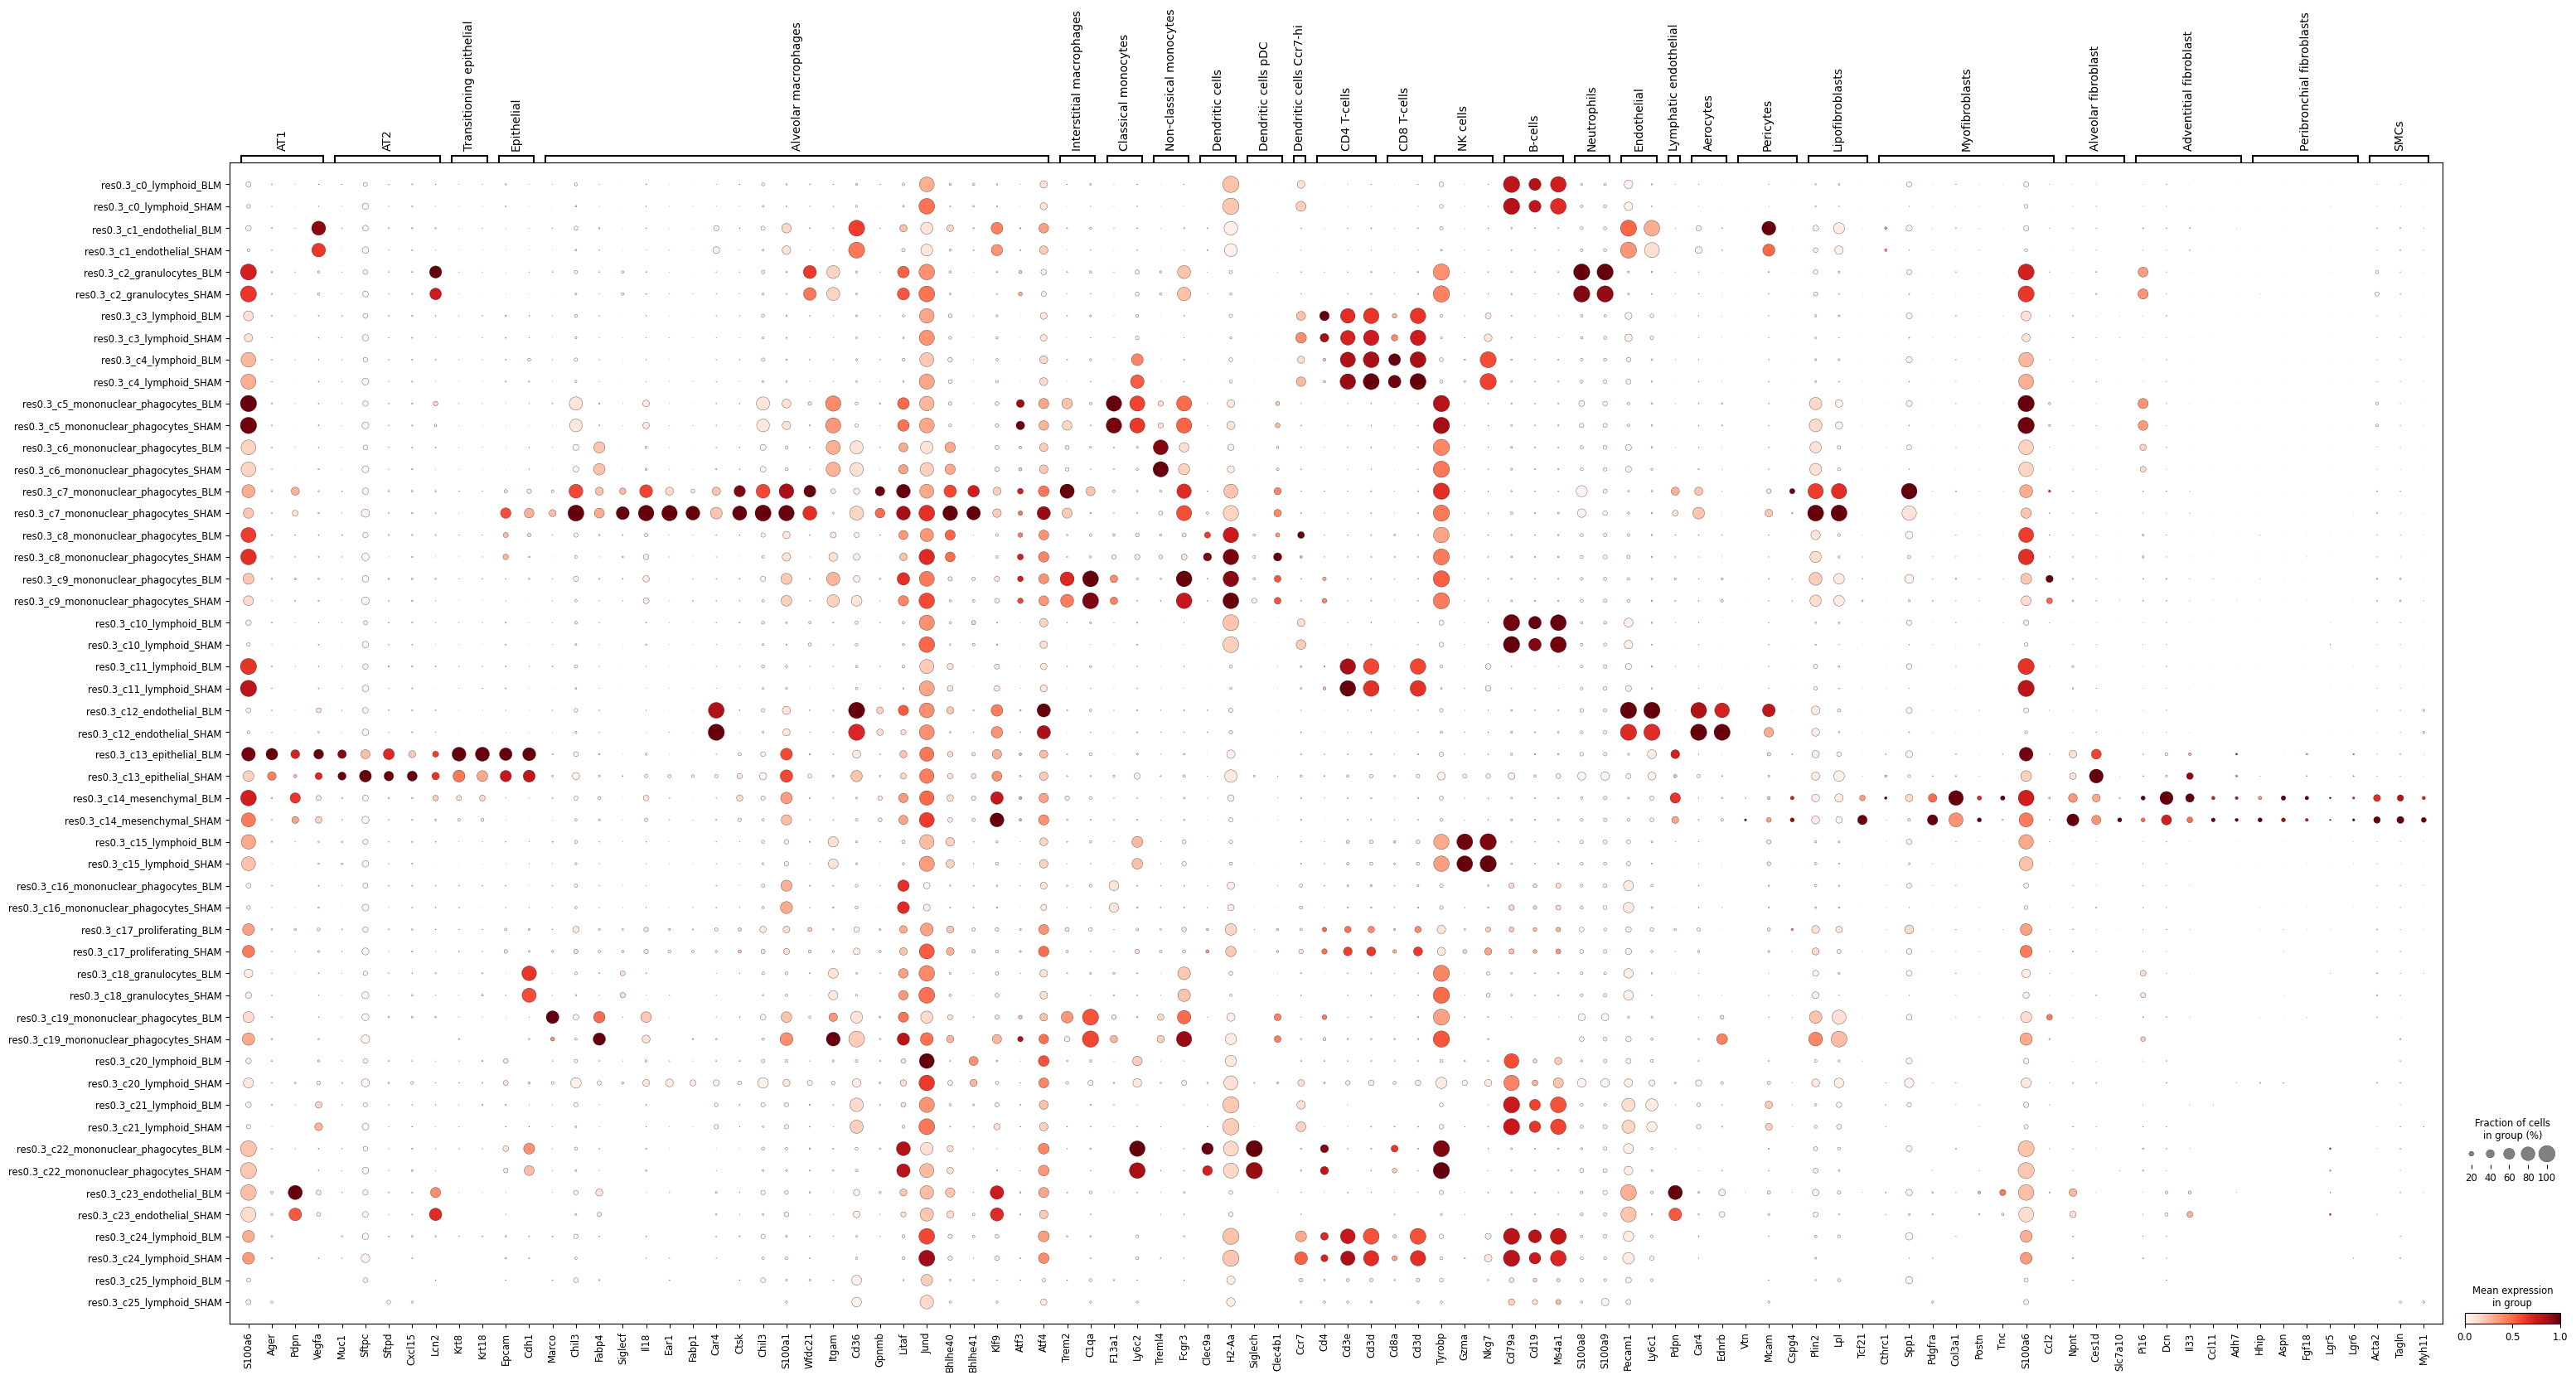

In [27]:
sc.pl.dotplot(adata, all_marker_genes, groupby=['clust_res0.3', "CELL_celltype_compartment","SAMP_condition"],  standard_scale="var")


### rank_genes_groups

In [24]:
sc.tl.rank_genes_groups(
    adata, layer="logcounts",  groupby="clust_res0.3", method="wilcoxon", key_added="dea_clust_res0.3"
)

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/tools/_ran

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


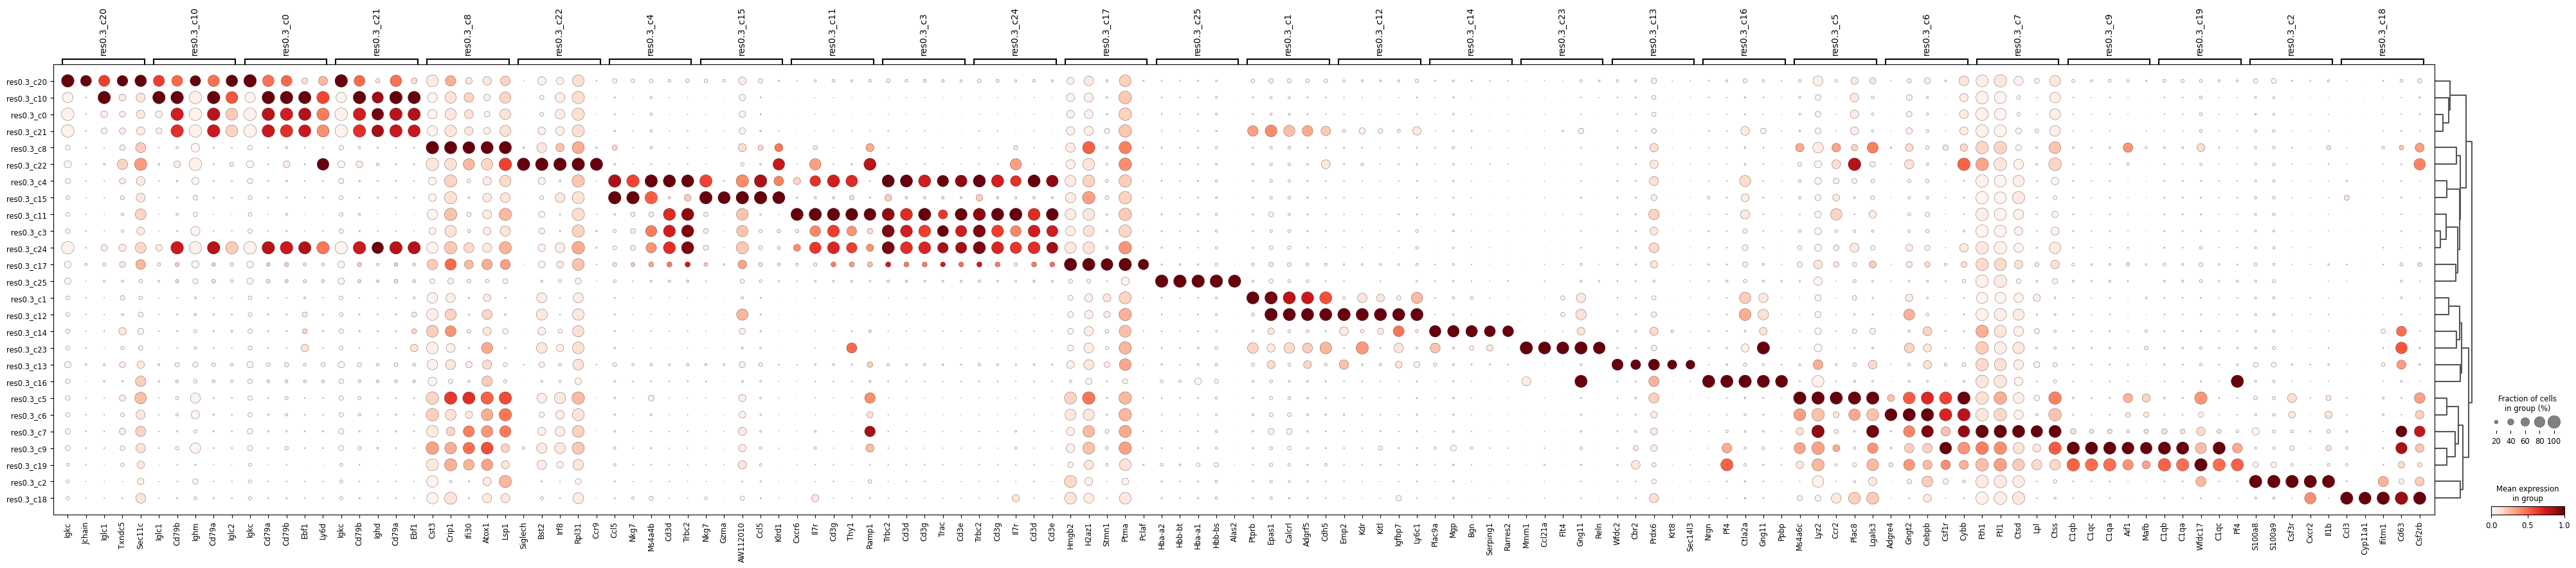

In [54]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="clust_res0.3", standard_scale="var", n_genes=5, key="dea_clust_res0.3"
)

- c25: erythrocytes
- c16: SMCs
- c17: T-cells
- c14: Fibroblasts

- Cluster 24: small cluster, expression pattern similar to c3 and c11 --> T cells

### Fine Annotation old clustering

In [207]:
manual_anno_res0_3 = {'res0.3_c0':"B-cells",
                      'res0.3_c1': "Endothelial", 
                      'res0.3_c2': "Neutrophils",
                      'res0.3_c3': "CD4 T-cells",
                      'res0.3_c4': "CD8 T-cells",
                      'res0.3_c5': "Classical monocytes",
                      'res0.3_c6': "Non-classical monocytes",
                      'res0.3_c7': "Alveolar macrophages",
                      'res0.3_c8': "Dendritic cells", 
                      'res0.3_c9': "Interstitial macrophages",
                      'res0.3_c10': "B-cells",
                      'res0.3_c11': "T-cells",
                      'res0.3_c12': "Aerocytes",
                      'res0.3_c13': "Epithelial", 
                      'res0.3_c14': "Fibroblasts",
                      'res0.3_c15': "NK cells",
                      'res0.3_c16': "SMCs",
                      'res0.3_c17': "T-cells", #? 
                      'res0.3_c18': "Granulocytes", #  granolocytes? 
                      'res0.3_c19': "Interstitial macrophages",
                      'res0.3_c20': "B-cells", # b cells? 
                      'res0.3_c21': "B-cells",
                      'res0.3_c22': "Dendritic cells",
                      'res0.3_c23': "Endothelial", 
                      'res0.3_c24': "T-cells",# cluster again --> still mixed t and b cells 
                      'res0.3_c25':"Erythrocytes"}

In [209]:
adata.obs["manual_celltype_annotation_clust_res0.3"] = adata.obs["clust_res0.3"].map(manual_anno_res0_3).astype("category")

In [215]:
#adata.obs = adata.obs.drop('leiden_res0.3', axis=1)

# Final Annotation Overview 

In [ ]:
 'manual_celltype_annotation_fine_leiden03',  'manual_celltype_annotation_clust_res0.3'

## fine annotation of old clusters

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


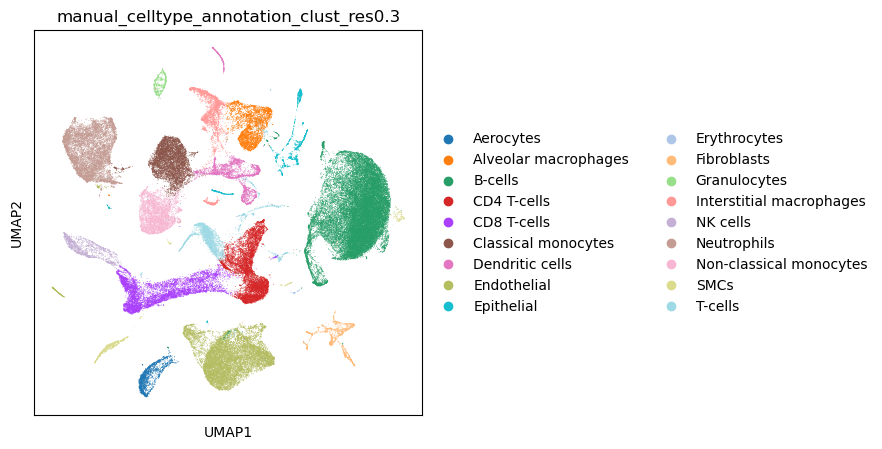

In [231]:
sc.pl.umap(adata, color=[ "manual_celltype_annotation_clust_res0.3", ])

## fine annotation of new clusters

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


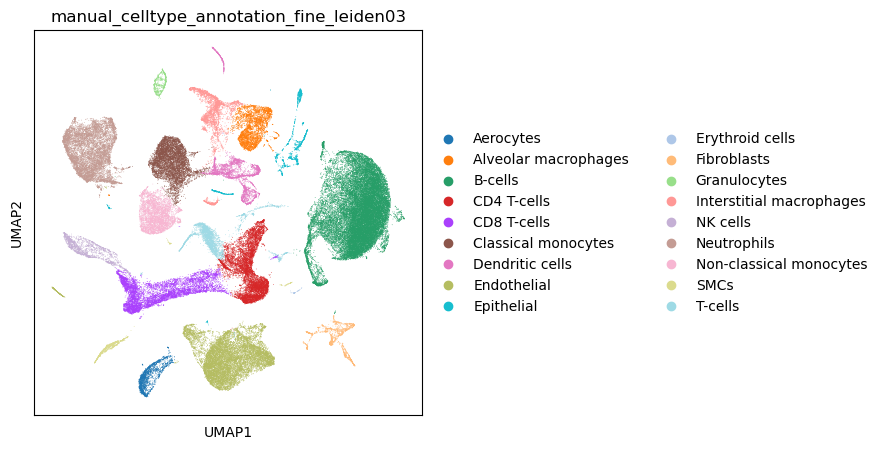

In [236]:
sc.pl.umap(adata, color=[ "manual_celltype_annotation_fine_leiden03"])

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


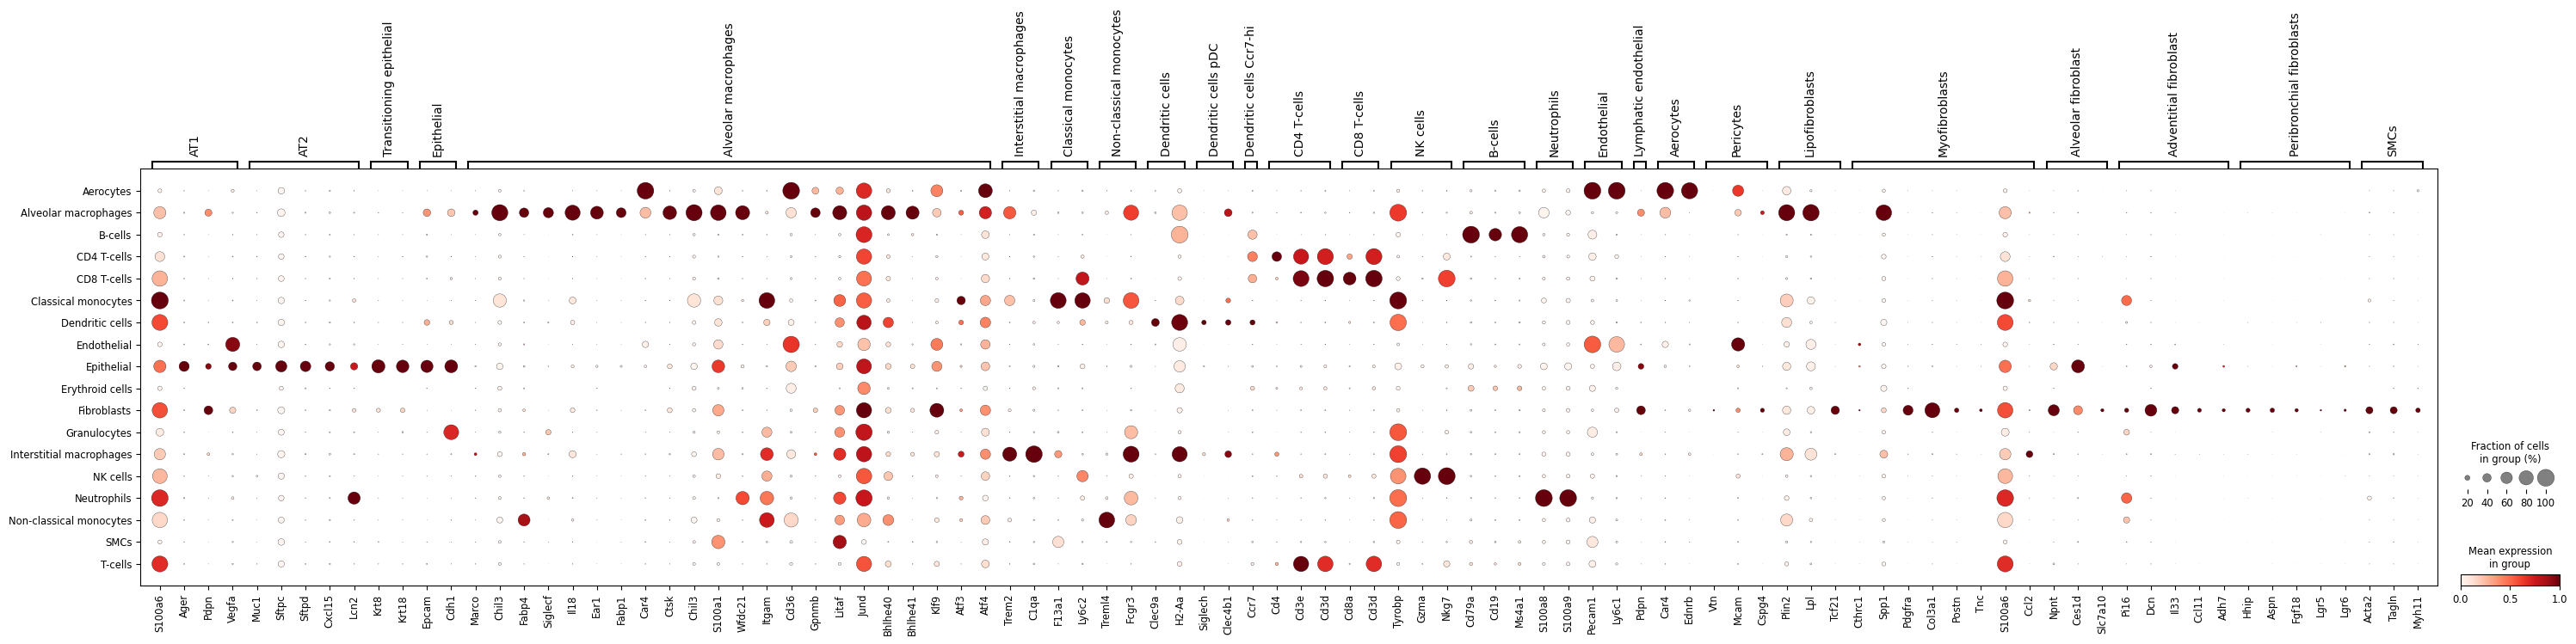

In [237]:
sc.pl.dotplot(adata, all_marker_genes, groupby=["manual_celltype_annotation_fine_leiden03"],  standard_scale="var")

In [63]:
adata.write("/home/p/pohll/Desktop/MP/data/galapagos_bleo_new_dr_leiden.h5ad")

# subcluster epithelial  (leiden 0.3 cluster 15)

In [2]:
adata = sc.read("/home/p/pohll/Desktop/MP/data/galapagos_bleo_new_dr_leiden.h5ad")

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


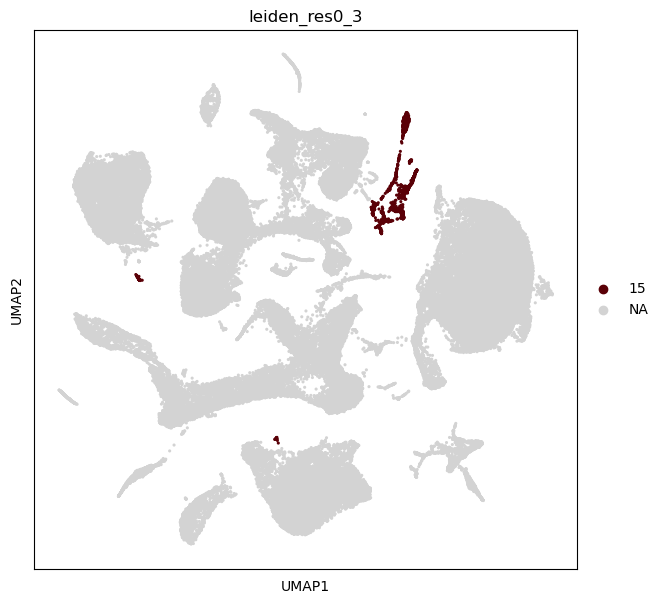

In [3]:
sc.pl.umap(adata, color="leiden_res0_3",groups="15" ,size=20)

In [12]:
sc.tl.leiden(adata, restrict_to= ("leiden_res0_3", ['15']),  key_added="leiden_res0_3", resolution=0.05 )

In [13]:
adata.obs["leiden_res0_3"].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15,0', '15,1', '15,2', '15,3', '15,4', '16', '17', '17,3',
       '17,4', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


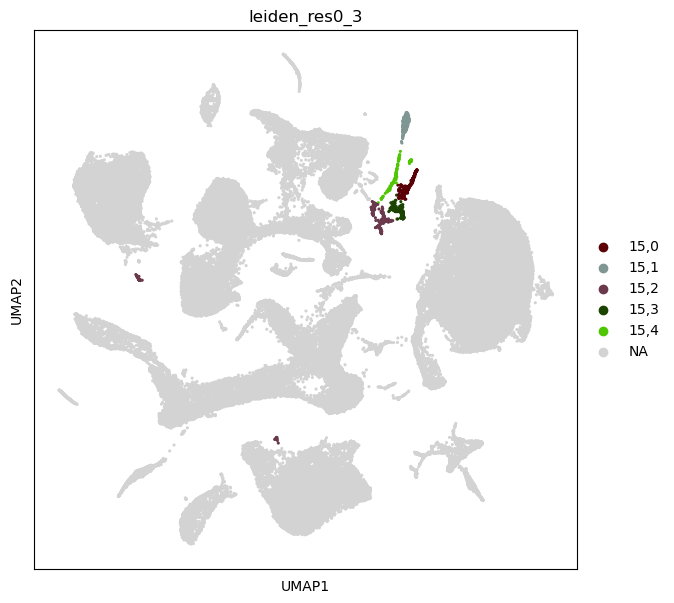

In [14]:
sc.pl.umap(adata, color="leiden_res0_3",groups=['15,0', '15,1', '15,2', '15,3', '15,4'],size=20)

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


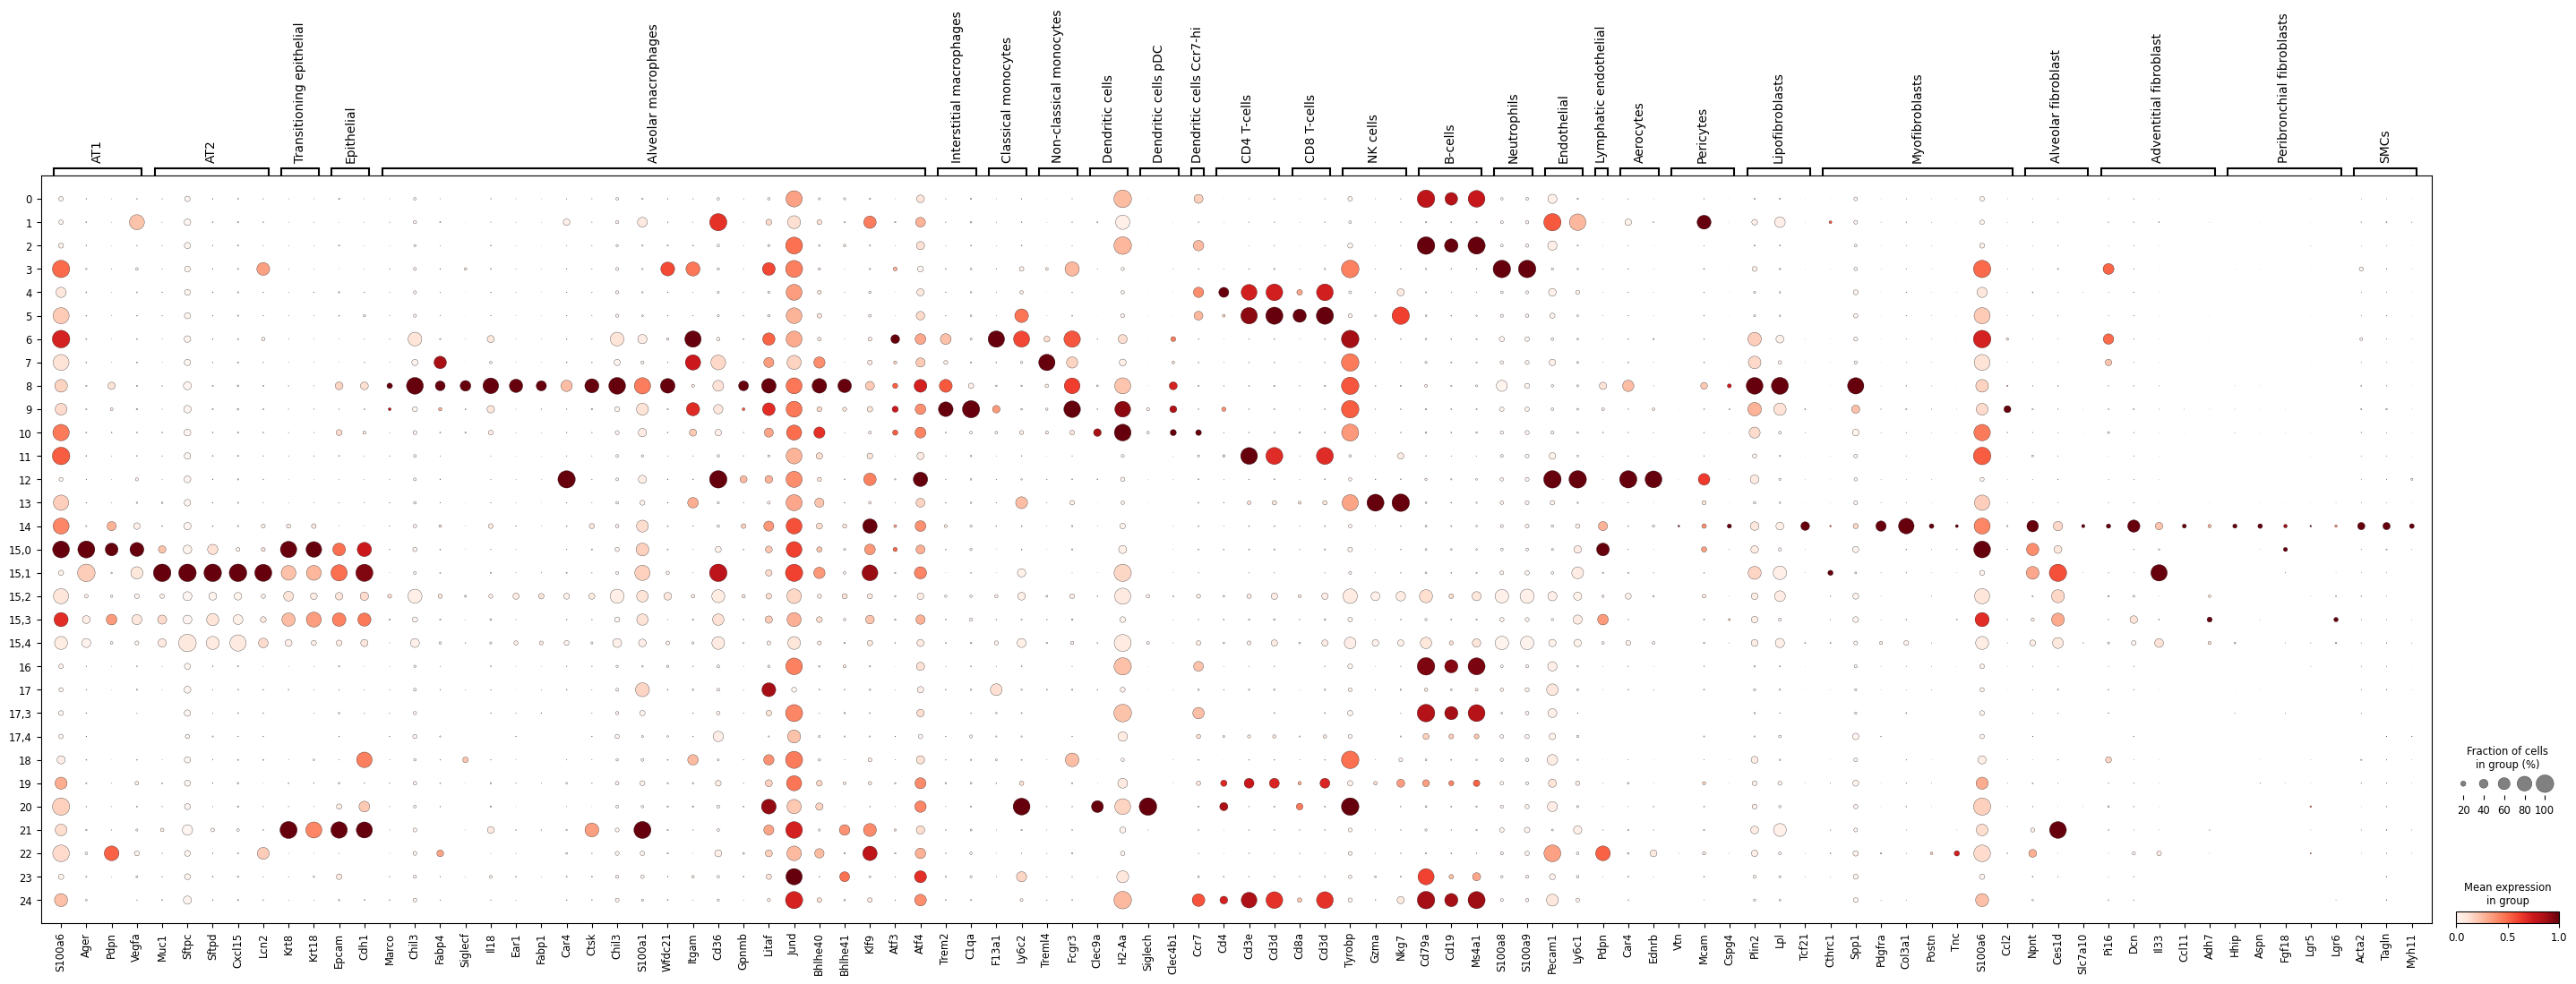

In [22]:
sc.pl.dotplot(adata, all_marker_genes, groupby='leiden_res0_3', standard_scale="var")

15,0 --> AT1
15,1 + 15,4 --> AT2 --> 15
15,2 --> Epithelial
15,3 --> Transitioning 


In [23]:
adata.obs["leiden_res0_3"] = adata.obs["leiden_res0_3"].replace("15,1", "15")
adata.obs["leiden_res0_3"] = adata.obs["leiden_res0_3"].replace("15,4", "15")

In [60]:
new_leiden_fine = {
    "0": "B-cells",
    "1": "Endothelial",
    "2": "B-cells",
    "3": "Neutrophils",
    "4": "CD4 T-cells",
    "5": "CD8 T-cells",
    "6": "Classical monocytes",
    "7": "Non-classical monocytes", # many doublets or B-cells 
    "8": "Alveolar macrophages",
    "9": "Interstitial macrophages",
    "10": "Dendritic cells",
    "11": "Regulatory T-cells",
    "12": "Aerocytes",
    "13": "NK cells",
    "14": "Fibroblasts",
    "15": "AT2",
    "15,0": "AT1",
    "15,2": "Epithelial",
    "15,3": "Transitioning epithelial",
    "16":"B-cells",
    "17":"SMCs",
    "17,3":"B-cells",
    "17,4":"Erythroid cells",
    "18":"Granulocytes",
    "19":"T-cells",
    "20":"Dendritic cells",
    "21":"Epithelial",
    "22":"Endothelial",
    "23":"B-cells",
    "24":"CD4 T-cells",
}

In [61]:
adata.obs["manual_celltype_annotation_fine_leiden03"] = adata.obs["leiden_res0_3"].map(new_leiden_fine).astype("category")

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


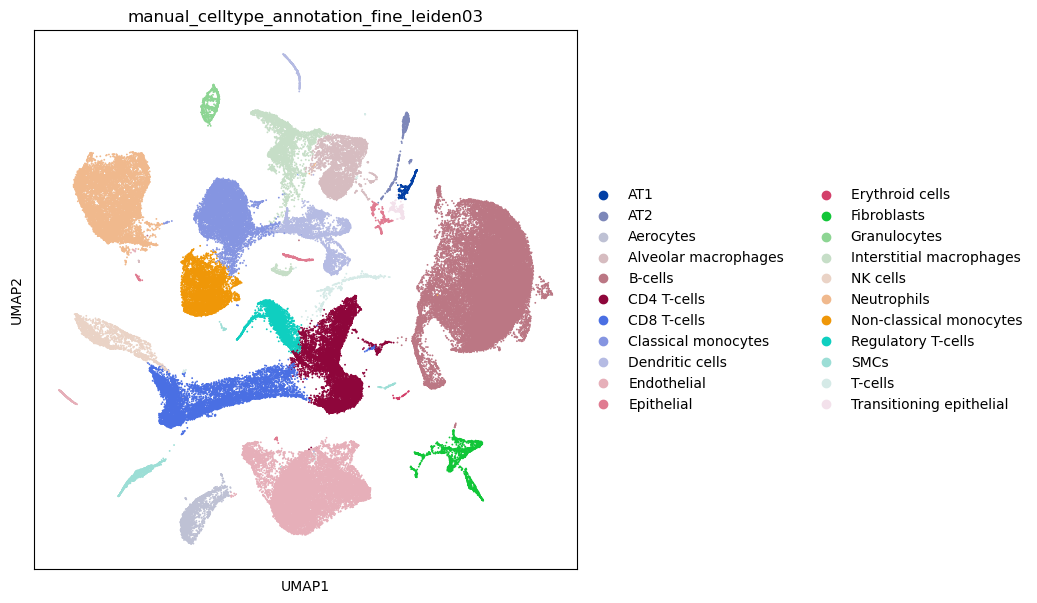

In [62]:
sc.pl.umap(adata, color=[ "manual_celltype_annotation_fine_leiden03"], size=7)

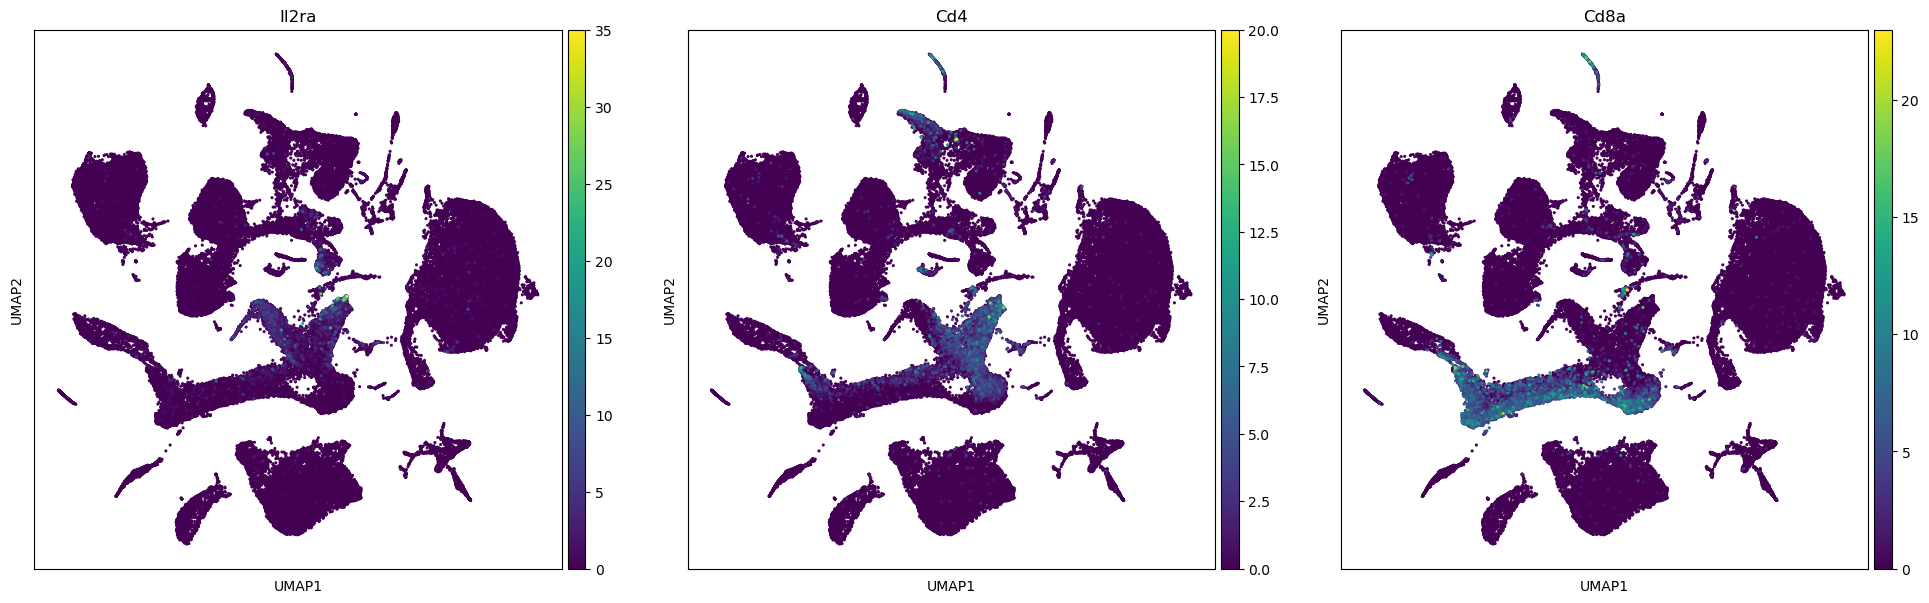

In [56]:
sc.pl.umap(adata, color=["Il2ra", "Cd4", "Cd8a"], size=20)

--> Il2ra --> regulatory t cells?